In [1]:
import netCDF4 as nc
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [8]:
output_path = '/data/nriemer/d/sf20/les_output/wrf-partmc'

data_subdir = os.path.join(output_path, 'slurm-1933379') 
aerodata = nc.Dataset(os.path.join(data_subdir, 'aerosols_d01_2023-03-20_09:00:00'))

In [9]:
aerodata['h2so4']

<class 'netCDF4._netCDF4.Variable'>
float32 h2so4(Time, bottom_top, south_north, west_east)
    FieldType: 104
    MemoryOrder: XYZ
    description: H2SO4 mixing ratio
    units: ppmv
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (8, 100, 40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used

0.50869834 40.102226 0.5185494 1.5830436


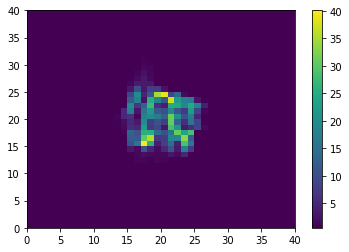

In [21]:
data_slice = 1000*aerodata['no'][7, 1, :, :]
plt.pcolormesh(data_slice)
print(data_slice.min(), data_slice.max(), np.median(data_slice), data_slice.mean())
plt.colorbar()

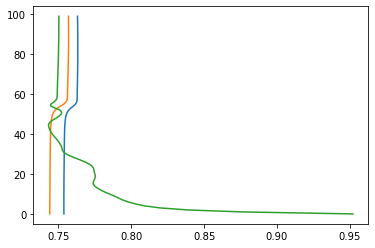

In [11]:
vertical_prof= 1000*aerodata['so2'][5, :, :, :].mean(axis=(1, 2))
plt.plot(vertical_prof, np.arange(100))

vertical_prof= 1000*aerodata['so2'][6, :, :, :].mean(axis=(1, 2))
plt.plot(vertical_prof, np.arange(100))

vertical_prof= 1000*aerodata['so2'][7, :, :, :].mean(axis=(1, 2))
plt.plot(vertical_prof, np.arange(100))

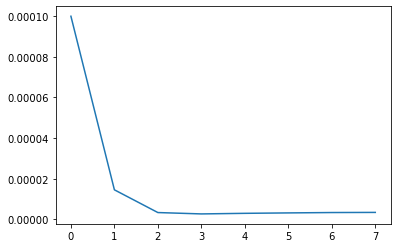

In [12]:
plt.plot(aerodata['h2so4'][:, :50, 20, :].max(axis=(1,2)))

In [22]:

data_subdir = os.path.join(output_path, 'slurm-1933512') 
aerodata = nc.Dataset(os.path.join(data_subdir, 'aerosols_d01_2023-03-20_09:00:00'))

67.01802 69.40283 68.996254 68.92206


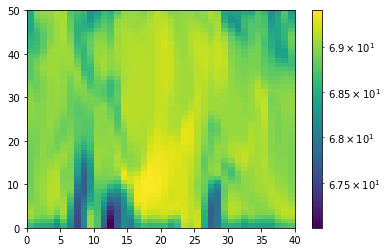

In [51]:
data_slice = 1000*aerodata['o3'][4, :50, :, 20]
plt.pcolormesh(data_slice, norm=matplotlib.colors.LogNorm()
               )
print(data_slice.min(), data_slice.max(), np.median(data_slice), data_slice.mean())
plt.colorbar()

In [2]:
output_path = '/data/nriemer/d/sf20/les_output/wrf-partmc'

#slurm_id = 1934602 # basecase
#slurm_id = 1935061 # point-source-10x10
slurm_id = 1935620 # point-source-1x1

data_subdir = os.path.join(output_path, f'slurm-{slurm_id}') 
aerodata = nc.Dataset(os.path.join(data_subdir, 'aerosols_d01_2023-03-20_09:00:00'))
aerodist = nc.Dataset(os.path.join(data_subdir, 'aerosol_dist_d01_2023-03-20_09:00:00'))

3863022400000.0 589107040000000.0 5896479400000.0 6314301000000.0


/data/keeling/a/sf20/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


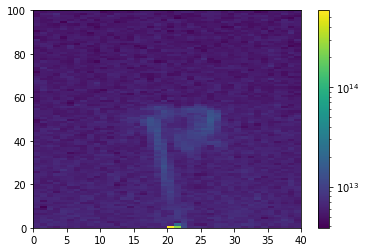

In [3]:
data_slice = 1000*aerodata['TOT_NUM_CONC'][3, :, 20, :]
plt.pcolormesh(data_slice, norm=matplotlib.colors.LogNorm()
               )
print(data_slice.min(), data_slice.max(), np.median(data_slice), data_slice.mean())
plt.colorbar()

In [4]:
def plotDists(i, j, k, time, **kwargs):
    
    fig, ax = plt.subplots(1,2, figsize=(8,4))

    # Configurable keyword arguments
    
    num_xlims = kwargs.get('num_xlims', (5e-9, 5e-6))
    num_ylims = kwargs.get('num_ylims', (1e1, 1e5))
    mass_xlims = kwargs.get('mass_xlims', (5e-9, 5e-6))
    mass_ylims = kwargs.get('mass_ylims', (1e-20, 1e-13))
    numconctimeidx=kwargs.get('numconctimeidx', 72)
    local_binning = kwargs.get('local_binning', None)
    #colors = plt.cm.viridis(np.linspace(.2, .9, times.size))

    for dist_idx, dist_type in enumerate(['num', 'mass']):
        scenario_distdata = aerodist


        x_vals = []
        bin_vals = []
        bin_edges = scenario_distdata['BIN_EDGES'][:].data[0]#scenario_aerodata['BIN_EDGES'][:].data[0]
        bin_centers = scenario_distdata['BIN_CENTERS'][:].data[0]#scenario_aerodata['BIN_CENTERS'][:].data[0]
        bin_width = bin_edges[1:] - bin_edges[:-1]
        for bin_idx in range(100):
            bin_idx += 1 # 1 indexing 
            bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j, i].data.item()#/1e6
            if local_binning:
                bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j-local_binning:j+local_binning, i-local_binning:i+local_binning].data#/1e6
                bin_data = bin_data.mean()
            bin_vals.append(bin_data/1e6)
            x_vals.append(bin_idx)

        ax[dist_idx].plot(bin_centers, bin_vals, lw=1.5)
        ax[dist_idx].set_xscale('log')

    ax[0].set_xlim(num_xlims[0], num_xlims[1])
    ax[0].set_ylim(num_ylims[0], num_ylims[1])
    ax[0].set_ylabel('Number concentration [cm$^{-3}$]')
    ax[0].set_xlabel('Diameter [m]')
    ax[0].set_title('Number distribution')
    ax[0].set_yscale('log')

    ax[1].set_xlim(mass_xlims[0], mass_xlims[1])
    #ax[1].set_ylim(mass_ylims[0], mass_ylims[1])
    ax[1].set_ylabel('Mass concentration [kg$\\cdot$ m$^{-3}$]')
    ax[1].set_xlabel('Diameter [m]')
    ax[1].set_title('Mass distribution')
    #ax[1].set_yscale('log')

    delta_t = 30 # minutes between history
    plt.suptitle(f'i={i}, j={j}, k={k}, t={delta_t*time} mins')
    plt.tight_layout()

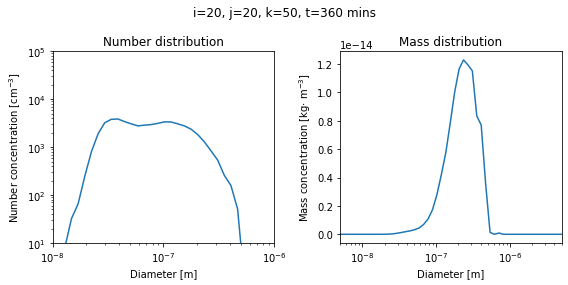

In [6]:
plotDists(20, 20, 50, 12, local_binning=10, num_xlims=(1e-8, 1e-6))

In [7]:
ccn_vars = [key for key in aerodata.variables.keys() if key.startswith('ccn_0')]

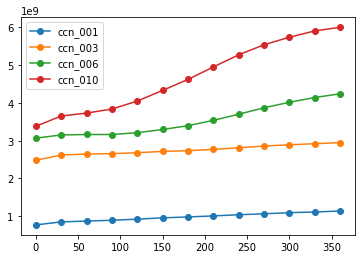

In [11]:
z_level = 25
times = np.arange(0, 361, 30)
for var in ccn_vars:
    plt.plot(times, aerodata[var][:, z_level, :, :].mean(axis=(1, 2)), label=var, marker='o')
plt.legend()

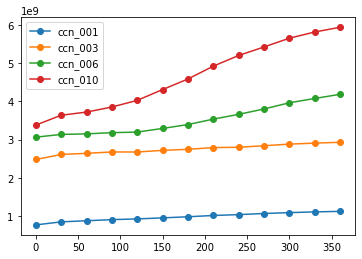

In [8]:
z_level = 25
times = np.arange(0, 361, 30)
for var in ccn_vars:
    plt.plot(times, aerodata[var][:, z_level, :, :].mean(axis=(1, 2)), label=var, marker='o')
plt.legend()

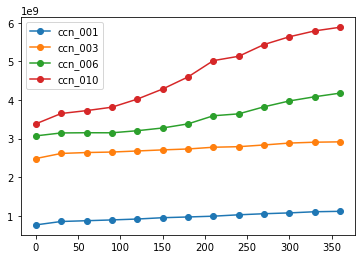

In [8]:
z_level = 25
times = np.arange(0, 361, 30)
for var in ccn_vars:
    plt.plot(times, aerodata[var][:, z_level, :, :].mean(axis=(1, 2)), label=var, marker='o')
plt.legend()